In [1]:
%matplotlib notebook

In [2]:
import functions
import plot_handler

In [3]:
import pandas as pd

# Plots for Acending Phase

In [18]:
df_asc = pd.read_csv('./data_csv.csv',
                        names=['time',
                               'P_in', 'P_out',
                               'T_in', 'T_out',
                               'Hum_in', 'Hum_out',
                               'CO2_V1', 'CO2_V2',
                               'O3_WE', 'O3_AE',
                               'Altitude'],
                      header=0,
                      usecols=[i for i in range(0,12)])

# print(df_asc)

## Plots refreshed by clicking

<IPython.core.display.Javascript object>


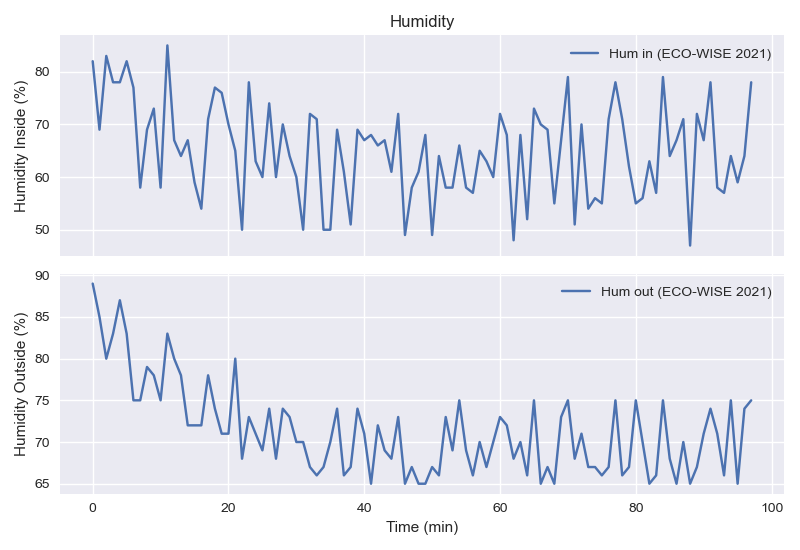

In [19]:
humidity_plot = plot_handler.humidity_plot(df_asc.loc[:,['time','Hum_in','Hum_out']])

<IPython.core.display.Javascript object>


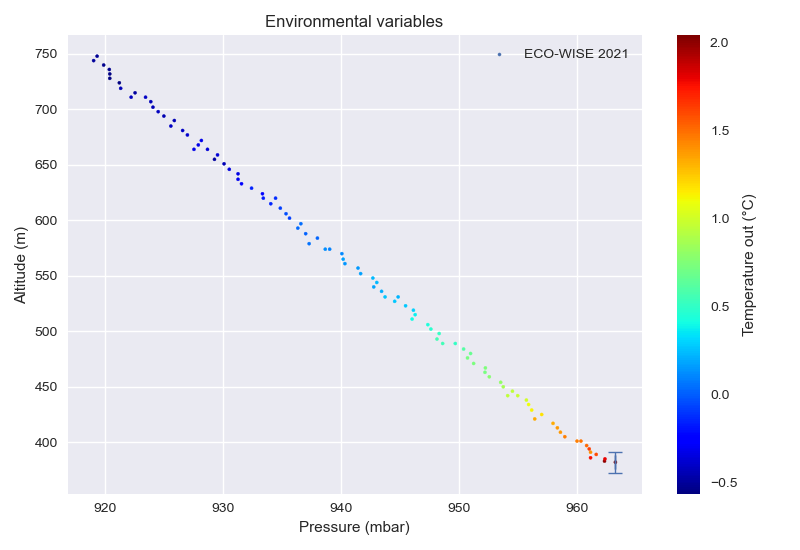

In [20]:
temp_out_plot = plot_handler.temp_press_out_plot(df_asc.loc[:,['T_out','P_out','Altitude']])

<IPython.core.display.Javascript object>


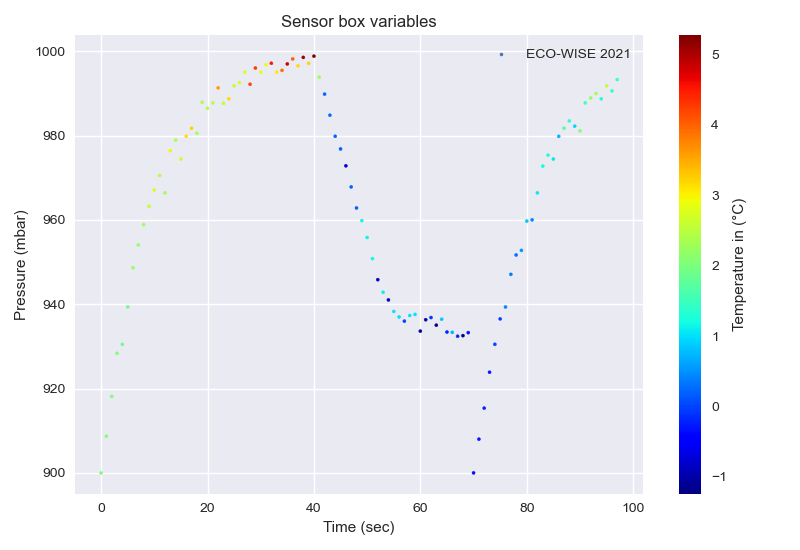

In [21]:
temp_in_plot = plot_handler.temp_press_in_plot(df_asc.loc[:,['T_in','P_in','time']])

<IPython.core.display.Javascript object>


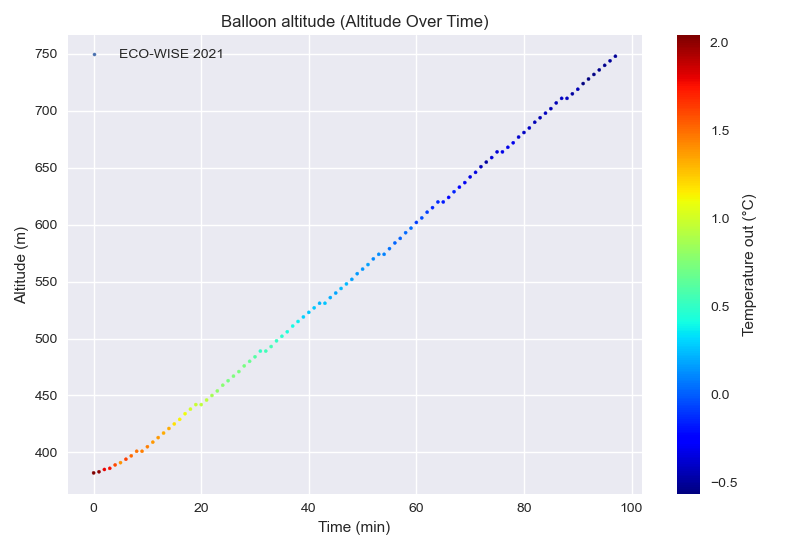

In [22]:
altitude_plot= plot_handler.altitude_time(df_asc.loc[:,['time','Altitude','T_out']])

<IPython.core.display.Javascript object>


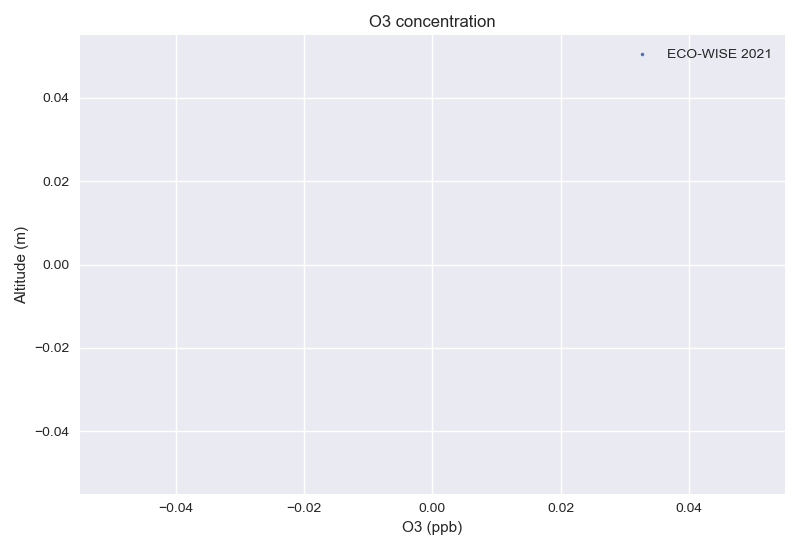

In [16]:
df_asc['O3_ppm']= None
df_asc['O3_ppm'] = df_asc.apply(functions.O3Concentration, axis=1)

O3_plot = plot_handler.O3_conc(df_asc.loc[:,['O3_ppm','Altitude']])

<IPython.core.display.Javascript object>


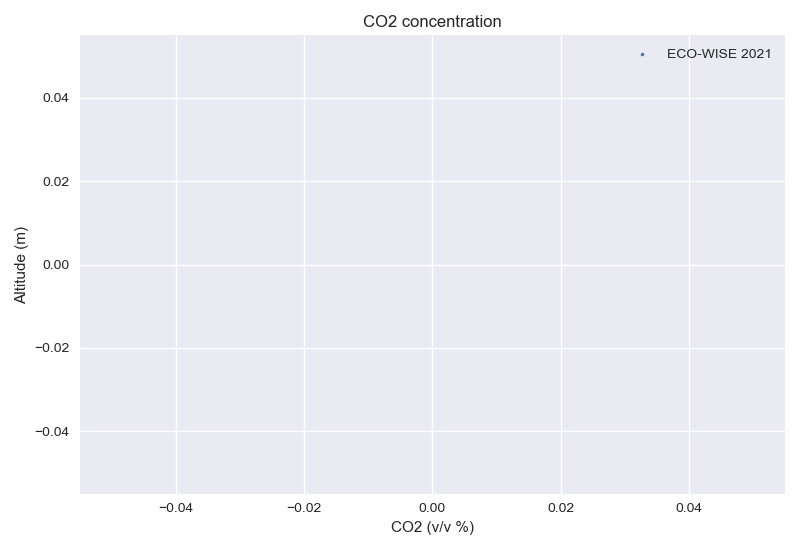

In [17]:
df_asc['CO2_C']= None
df_asc['CO2_C'] = df_asc.apply(functions.CO2Concentration, axis=1)

CO2_plot = plot_handler.CO2_conc(df_asc.loc[:,['CO2_C','Altitude']])

In [ ]:
df_asc['flags'] = df_asc.apply(lambda x: 1 if (x["valve_1"]==1 and x["valve_2"]==0) else 0, axis=1)
df_asc['Flowrate'] = functions.flowrate(df_asc.mask(lambda x: x['flags']!=1))
# TODO: Not ready yet

## Plots automatically refreshed

In [ ]:
df_asc['Flowrate'] = functions.flowrate(df_asc.mask(lambda x: x['flags']!=1))

# TODO: Not ready yet

In [ ]:
# TODO: Not ready yet

In [ ]:
# TODO: Not ready yet

# Plots for Floating Phase

In [ ]:
df_float = pd.read_csv('./data_csv.csv',
                        names=['time',
                               'P_in', 'P_out',
                               'T_in', 'T_out',
                               'Hum_in', 'Hum_out',
                               'CO2_V1', 'CO2_V2',
                               'O3_WE', 'O3_AE',
                               'Altitude'],
                      header=0,
                      usecols=[i for i in range(0,12)])

# print(df_float)

## Plots refreshed by clicking

In [ ]:
humidity_plot = plot_handler.humidity_plot(df_float.loc[:,['time','Hum_in','Hum_out']])

In [ ]:
temp_out_plot = plot_handler.temp_press_out_plot(df_float.loc[:,['T_out','P_out','Altitude']])

In [ ]:
temp_in_plot = plot_handler.temp_press_in_plot(df_float.loc[:,['T_in','P_in','time']])

In [ ]:
altitude_plot= plot_handler.altitude_time(df_float.loc[:,['time','Altitude','T_out']])

In [ ]:
df_float['O3_ppm'] = df_float.apply(functions.O3Concentration, axis=1)

# TODO: Not ready yet

In [ ]:
df_float['CO2_C'] = df_float.apply(functions.CO2Concentration, axis=1)

# TODO: Not ready yet

## Plots automatically refreshed

In [ ]:
df_float['Flowrate'] = functions.flowrate(df_float.mask(lambda x: x['flags']!=1))

# TODO: Not ready yet

In [ ]:
# TODO: Not ready yet